# Kr NEW Compare KrMap - ICAROS Map - Apply to bb0nu

J. A Hernando, C. Herves

May 2022

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats
from   scipy             import optimize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana    as krana
import nana.kr.icaros   as icaros

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit
from invisible_cities.io.dst_io import load_dst, load_dsts
#import invisible_cities.io.dst_io as dio

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Sun May 15 18:25:08 2022


In [5]:
#import os
import re
import glob

from collections import namedtuple

## Access Data

In [6]:
path = '/Users/hernando/work/investigacion/NEXT/data/NEXT100/'

In [7]:
run  = 'MC00'
mapfilename = path + 'Kr/maps/map_NEXT100_' + str(run) + '.h5'

In [8]:
icaromap = icaros.get_map(mapfilename)
icarocor = icaros.get_correction(icaromap)

In [9]:
run_kr = 'MC00'
krmap  = krana.load('krmap' , 'krmap_'+str(run_kr)+'.h5')
#xyprof = prof .load('xyprof', 'krmap_'+str(run)+'.h5')

('counts', 'eref', 'dedt', 'dtref', 'ueref', 'udedt', 'cov', 'chi2', 'pvalue', 'sigma', 'success')


In [10]:
from os import listdir

run = 'bb0nu/'
filenames = listdir(path+str(run))
filenames.sort()
print(len(filenames), filenames[0], filenames[-1])
filenames = [path + str(run) + '/' + ifile for ifile in filenames]

chits = load_dsts(filenames, "RECO", "Events")
#kdst = load_dsts(filenames, "DST", "Events")

200 penthesilea_100_0nubb.h5 penthesilea_9_0nubb.h5


In [11]:
vdrift = 0.84
chits  = chits.rename(columns = {'E' : 'energy', 'X' : 'x', 'Y' : 'y', 'Z' : 'z'})
chits  = chits[['event', 'time', 'energy', 'x', 'y', 'z']]
chits['dtime'] = chits.z/vdrift
chits['r']     = np.sqrt(chits.x**2 + chits.y**2)

In [12]:
#krana.plot_data(chits[chits.x != 0.], 60)

In [13]:
dfevt   = {}
dfevt['x']       = chits.groupby('event')['x'].mean()
dfevt['y']       = chits.groupby('event')['y'].mean()
dfevt['z']       = chits.groupby('event')['z'].mean()
dfevt['energy']  = chits.groupby('event')['energy'].sum()
dfevt['dtime']   = chits.groupby('event')['dtime'].mean()
dfevt['event']   = chits.groupby('event')['event'].max()
dfevt['time']    = chits.groupby('event')['time'].mean
dfevt            = pd.DataFrame(dfevt)

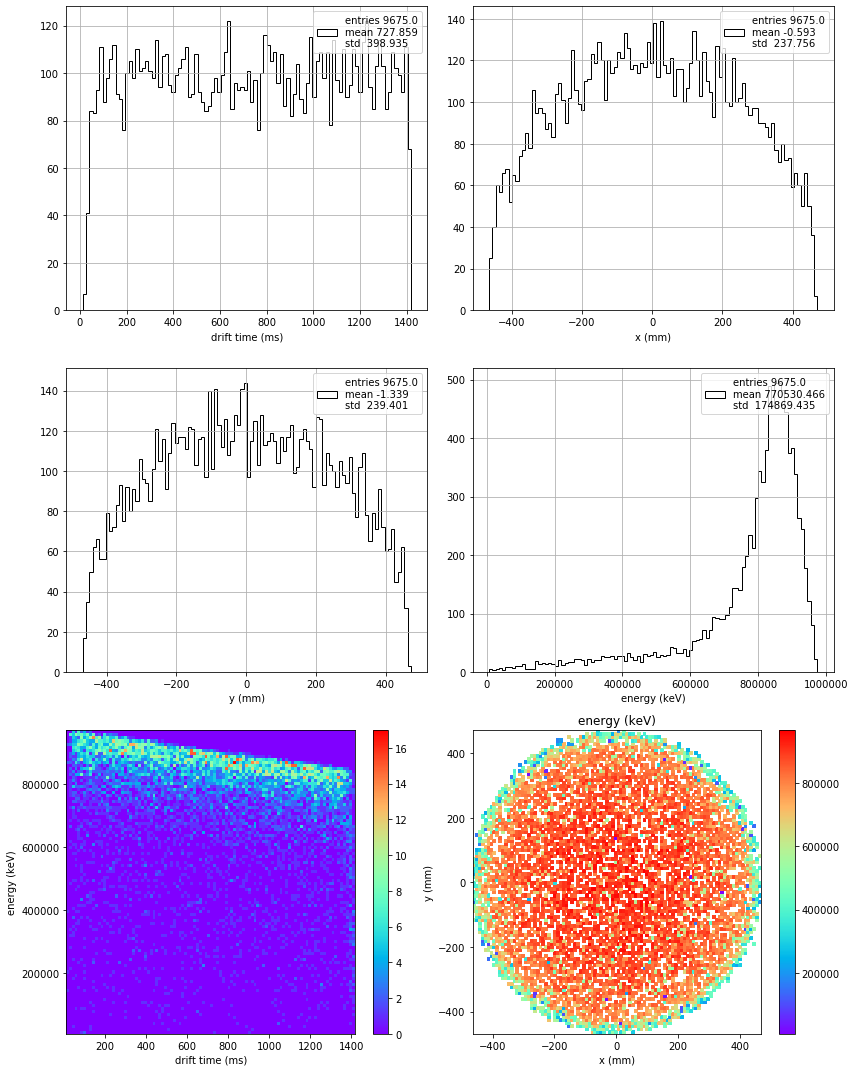

In [14]:
krana.plot_data(dfevt, 100);

In [15]:
coors = (chits.x, chits.y)
dt    = chits.dtime 
ene   = chits.energy
krene = krana.krmap_scale(coors, dt, ene, krmap, 41.5)

In [16]:
chits['krenergy'] = krene
dfevt['krenergy'] = chits.groupby('event')['krenergy'].sum()

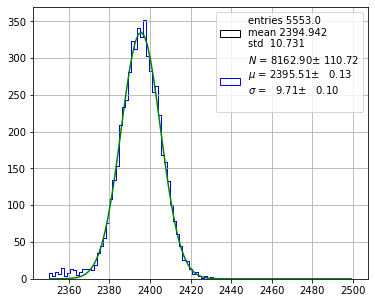

In [17]:
canvas = pltext.canvas(1, 1)
pltext.hist(dfevt['krenergy'], 100, range = (2350, 2500));
pltext.hfit(dfevt['krenergy'], 100, range = (2350, 2500), fun = 'gaus');

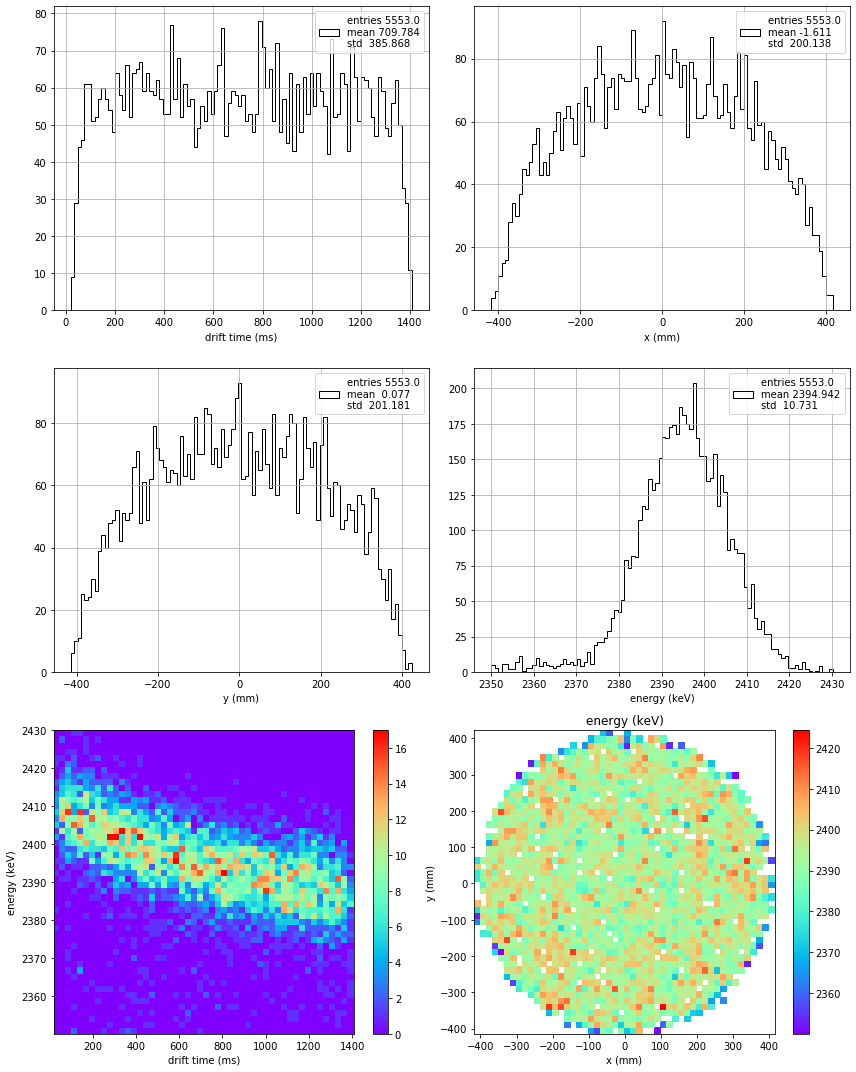

In [18]:
xdf           = pd.DataFrame(dfevt)
xdf['energy'] = xdf.krenergy

xsel = ut.in_range(xdf.energy, (2350, 2500))
krana.plot_data(xdf[xsel], 50);

In [19]:
erange = (2350, 2500)
esel   = ut.in_range(dfevt.krenergy, erange) 
zs     = dfevt.z[esel]
ene    = dfevt.krenergy[esel]
zprof, _  = prof.profile((zs), ene, 100)

cene   = prof.profile_scale((zs,), ene, zprof, 2458.)

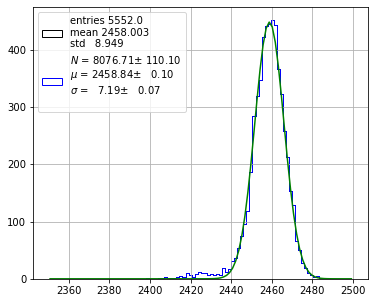

In [20]:
canvas = pltext.canvas(1, 1)
pltext.hist(cene, 100, range = (2350, 2500));
pltext.hfit(cene, 100, range = (2350, 2500), fun = 'gaus');

In [25]:
235.5 * 7.2/2458

0.6898291293734744

## ICARO

In [21]:
x    = chits.x.values 
y    = chits.y.values
z    = chits.z.values
time = chits.time.values 
ene  = chits.energy.values
enec = 1e3 * ene * icarocor(x, y, z, time)
chits['icenergy'] = enec

In [22]:
dfevt['icenergy'] = chits.groupby('event')['icenergy'].sum()

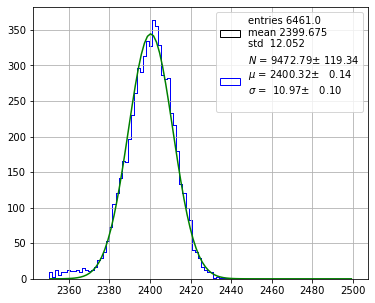

In [23]:
canvas = pltext.canvas(1, 1)
pltext.hist(dfevt['icenergy'], 100, range = (2350, 2500));
pltext.hfit(dfevt['icenergy'], 100, range = (2350, 2500), fun = 'gaus');

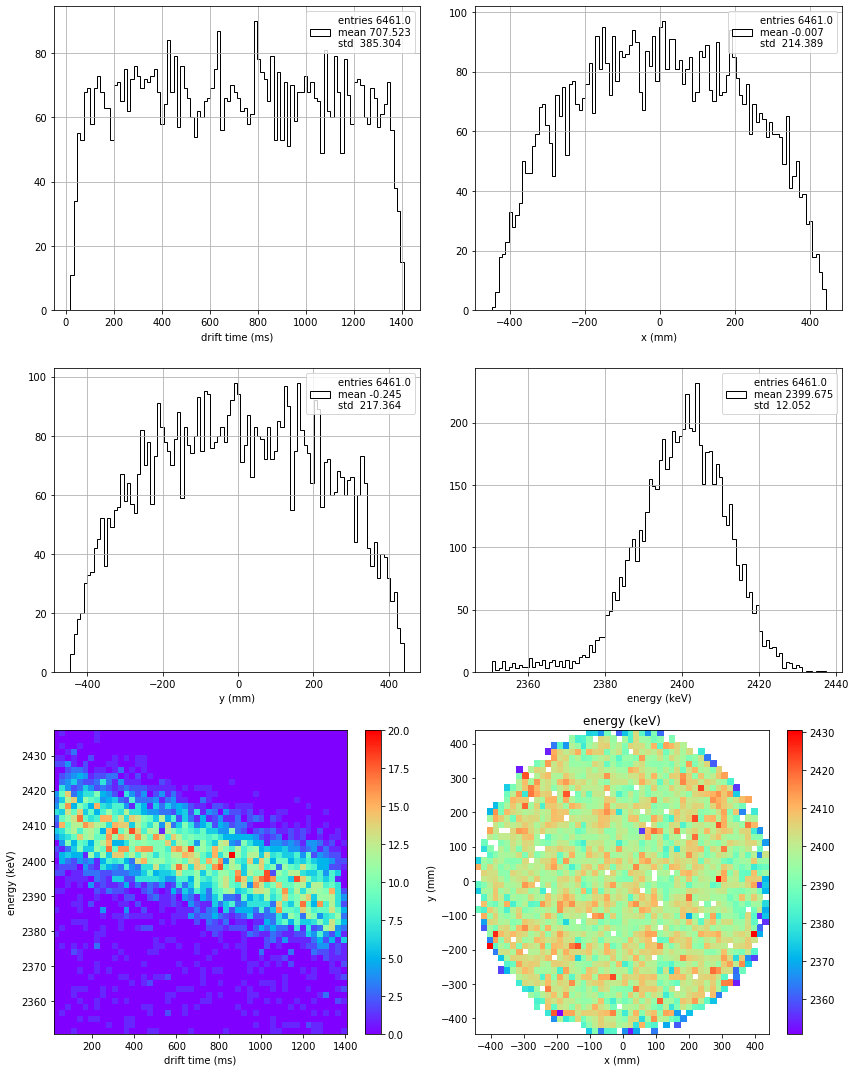

In [24]:
xdf = pd.DataFrame(dfevt)
xdf['energy'] = xdf.icenergy

xsel = ut.in_range(xdf.energy, (2350, 2500))
krana.plot_data(xdf[xsel], 50);